# Importando bibliotecas e dados

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt  # Importando a biblioteca para plotar gráficos.
from scipy import stats  # Trazendo funções para estatísticas e análises de dados.
import seaborn as sns # visualização de dados aprofundada
df = pd.read_csv(r'C:\Users\victo\Documents\Base de dados\songs.csv')

# Checagem inicial dos dados + Limpeza dos dados

In [4]:
# Checando tipo de dado de cada coluna
tipo_dados = df.dtypes
print(tipo_dados)

# Checando duplicatas
duplicatas = df.duplicated().sum()
print(f'Total de duplicatas: {duplicatas}')

# Identificando possíveis valores faltantes 
faltantes = df.isnull().sum()
print(faltantes[faltantes > 0])

# Eliminando linhas com valores ausentes
df_limpo_linhas = df.dropna()

# Eliminando colunas com valores ausentes
df_limpo_colunas = df.dropna(axis=1)

# Checando valores faltantes após a limpeza
faltantes_limpo_linhas = df_limpo_linhas.isnull().sum()
faltantes_limpo_colunas = df_limpo_colunas.isnull().sum()

print(f'Valores faltantes após a limpeza (linhas): {faltantes_limpo_linhas[faltantes_limpo_linhas > 0]}')
print(f'Valores faltantes após a limpeza (colunas): {faltantes_limpo_colunas[faltantes_limpo_colunas > 0]}')

# Identificando Outliers utilizando Z-score 
# Z-score: Se um determinado ponto x resultar em um z-score > 3.0 ou < -3.0, então x é considerado um outlier.

# Calculando Z-score para as colunas numéricas
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identificando os outliers (maiores que 3 ou menores que -3 em qualquer eixo)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Número de outliers detectados
print(f'Número de Outliers detectados: {df_outliers.shape[0]}')

# Removendo Outliers detectados
df_novo = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
df_novo.info()

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object
Total de duplicatas: 0
in_shazam_charts    50
key                 95
dtype: int64
Valores faltantes após a limpeza (linhas): Series([], dtype: int64)
Valores faltantes após a limpeza (colunas): Series([], dtype:

# Visualizando os dados

In [5]:
# Configurando Pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)
# Visualizando data frame 
df_novo.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33,Not Found
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150,37,202,21,5,168,150,F,Minor,78,52,82,18,0,15,7,https://i.scdn.co/image/ab67616d0000b2733d98a0...
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,100,54,14,187,100,B,Major,86,67,66,14,0,12,16,https://i.scdn.co/image/ab67616d0000b27329ebee...


In [6]:
# Informações básicas do data frame
df_novo.info()

# Visualizando o nome das colunas
print(df_novo.columns)

# Visualizando linhas e colunas 
print(f'Linhas e Colunas do DF: {df_novo.shape}')


<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 1 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            779 non-null    object
 1   artist(s)_name        779 non-null    object
 2   artist_count          779 non-null    int64 
 3   released_year         779 non-null    int64 
 4   released_month        779 non-null    int64 
 5   released_day          779 non-null    int64 
 6   in_spotify_playlists  779 non-null    int64 
 7   in_spotify_charts     779 non-null    int64 
 8   streams               779 non-null    object
 9   in_apple_playlists    779 non-null    int64 
 10  in_apple_charts       779 non-null    int64 
 11  in_deezer_playlists   779 non-null    object
 12  in_deezer_charts      779 non-null    int64 
 13  in_shazam_charts      745 non-null    object
 14  bpm                   779 non-null    int64 
 15  key                   704 non-null    object


# Estatistica de resumo

In [7]:
df_novo.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.507060,2020.390244,6.134788,14.340180,3696.139923,9.878049,52.726573,45.600770,1.915276,122.682927,67.376123,50.825417,64.216945,26.758665,0.522465,17.077022,9.946085
std,0.728339,4.550681,3.515819,9.106401,4723.689483,14.365296,58.863080,43.469767,3.958397,28.083942,14.311302,23.441286,16.135127,25.873000,2.652146,11.011059,9.033338
min,1.000000,1985.000000,1.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,65.000000,25.000000,4.000000,16.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,821.500000,0.000000,12.000000,6.000000,0.000000,99.000000,58.000000,32.000000,53.500000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,1963.000000,3.000000,29.000000,31.000000,0.000000,121.000000,70.000000,50.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4521.000000,15.000000,72.000000,79.000000,1.000000,141.000000,78.000000,69.000000,77.000000,42.000000,0.000000,22.000000,12.000000
max,4.000000,2023.000000,12.000000,31.000000,28032.000000,69.000000,315.000000,202.000000,20.000000,206.000000,96.000000,97.000000,97.000000,97.000000,24.000000,58.000000,39.000000


# Possiveis perguntas de mercado + análises e resultados

# Quais são os artistas com mais músicas em playlists? 

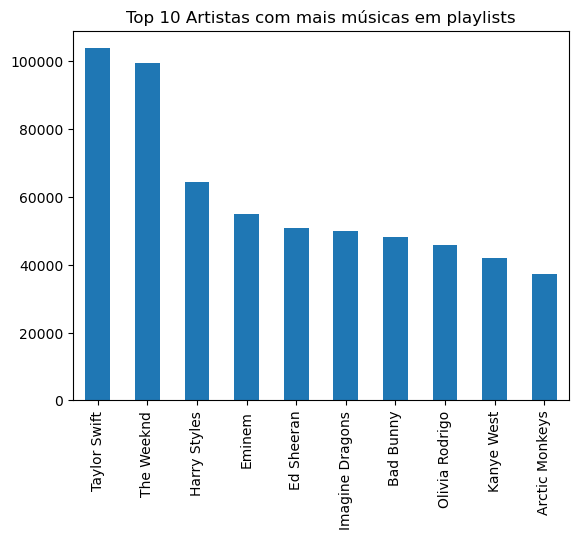

In [8]:
# Agruparemos os dados por artistas e contaremos a quantidade de músicas de cada artista em playlists ou charts.

pop_artistas = df_novo.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False)

ax = pop_artistas.head(10).plot(kind='bar', title='Top 10 Artistas com mais músicas em playlists')

# Removendo o rótulo do eixo x
ax.set_xlabel('')

plt.show()


# Como podemos agrupar músicas com características semelhantes para criar playlists personalizadas, recomendar conteúdos ou segmentar o público de forma mais eficiente?

c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\victo\AppData\Local\Temp\ipykernel_26064\2599563501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['cluster'] = kmeans.fit_predict(X)


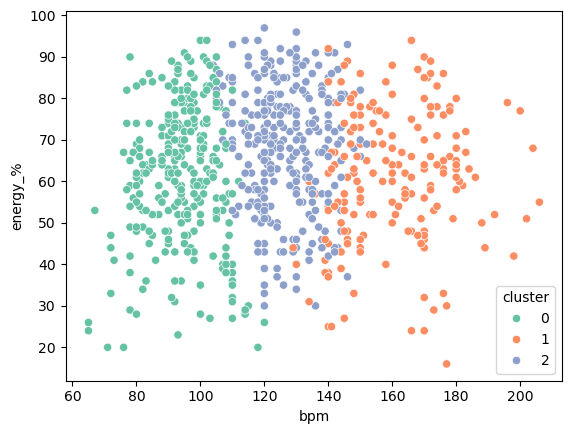

In [9]:
# Agruparemos as músicas em clusters com base em suas características (BPM, energia, dançabilidade, etc.).
# Para isso iremos usar algoritmos de clustering como K-Means para segmentar as músicas em diferentes grupos baseados em atributos musicais.

from sklearn.cluster import KMeans

# Definindo características

X = df_novo[['bpm', 'energy_%', 'danceability_%']]

# K-means
kmeans = KMeans(n_clusters=3, random_state=12) # Definindo random_state a uma constante teremos que o comportamento aleatório será determinístico.
df_novo['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='bpm', y='energy_%', hue='cluster', data=df_novo, palette='Set2')
plt.show()



In [10]:
#Cluster 0 (Verde)

#Este grupo contém músicas que, em sua maioria, têm BPM entre aproximadamente 60 e 120 e uma Energy entre 20% e 95%.
#Podemos inferir que essas músicas têm uma energia moderada e tendem a ser mais lentas em termos de BPM.

#Cluster 1 (Azul)

#Este grupo tem músicas com BPM entre 110 e 150 e Energy variando entre 30% e 95%.
#Essas músicas têm BPM intermediário, e a energia varia muito dentro deste grupo, indicando uma diversidade de gêneros ou estilos musicais.

#Cluster 2 (Laranja)
#Contém músicas com BPM mais altos, entre 140 e 200, e Energy maior, entre 10% e 90%.
#Este grupo representa músicas mais rápidas e com alta energia, o que sugere que podem pertencer a gêneros como música eletrônica, dance, ou rock mais agitado.

#O K-Means valeu a pena até certo ponto, pois permitiu identificar 3 grupos distintos de músicas com base nas suas características musicais



c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

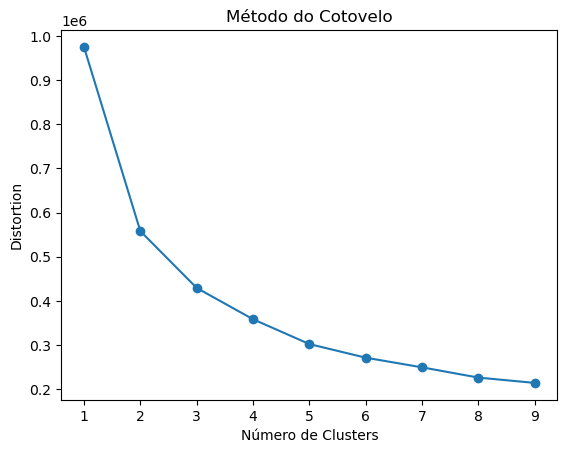

In [11]:
# Verificando se 3 clusters é a quantidade ideal.
# Método do Cotovelo
# O objetivo do método do cotovelo é encontrar o ponto onde a distorção diminui drasticamente e depois começa a se estabilizar. 
# Esse seria o ponto que indica o número ideal de clusters.

distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# o gráfico sugere que 3 clusters equilibram bem a simplicidade e a qualidade do agrupamento.

# Quais atributos musicais (ex: BPM, energia, dançabilidade) estão mais correlacionados com o sucesso (número de streams)?

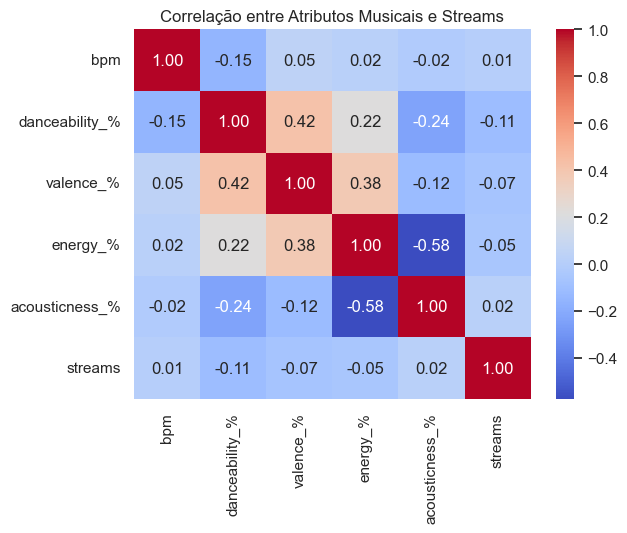

In [76]:
# Calculando a correlação entre atributos musicais e streams
Matriz_corr = df_novo[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'streams']].corr()

# Criando o mapa de calor
sns.heatmap(Matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Atributos Musicais e Streams')
plt.show()



In [13]:
# Interpretação 

#A correlação entre atributos musicais e o número de streams é, em sua maioria, muito baixa, 
#indicando que não há um único fator musical fortemente determinante do sucesso de uma música (pelo menos com base nesses atributos).
#Isso significa que o sucesso de uma música pode depender de uma combinação de outros fatores, como marketing, exposição em playlists ou a própria base de fãs do artista, além das características puramente musicais.


# Quais tendências podem ser observadas em relação aos meses de lançamento das músicas mais transmitidas?

In [14]:
import plotly.express as px
contagem_mensal= df_novo['released_month'].value_counts().sort_index()
fig = px.bar(x=contagem_mensal.index, 
              y=contagem_mensal.values, 
              title='Número de músicas mais transmitidas por mês de lançamento',
              labels={'x': 'Mês de Lançamento', 'y': 'Número de Sons'},
              color=contagem_mensal.values,
              color_continuous_scale='Turbo')
fig.show()

In [15]:
# Observa-se que o mês de maio tende a lançar as músicas mais transmitidas com uma frequência consideravelmente maior que os outros meses

# Qual a distribuição de BPM nas músicas de sucesso, e qual faixa de BPM está mais associada ao sucesso?

In [16]:
import plotly.express as px # Nos da a ferramenta para adcionar o titulo na legenda

dist_bpm = px.histogram(
    df_novo, 
    x='bpm', 
    title='Distribuição de BPM',
    color='released_year',
    color_discrete_sequence=px.colors.qualitative.Plotly, 
    labels={'released_year': 'Ano de Lançamento'} 
)

# Atualizando o layout para alterar o rótulo do eixo y
dist_bpm.update_layout(yaxis_title='Contagem')


dist_bpm.show()

In [17]:
# A maior parte das músicas está concentrada na faixa de 80 a 140 BPM, o que é comum, pois essa faixa é associada a ritmos moderados e mais dançantes, adequados para uma ampla gama de gêneros musicais.
# O ano de 2023 (em vermelho) e o ano de 2022 (em azul) têm a maior presença de músicas distribuídas por diversas faixas de BPM, sugerindo que esses anos recentes lançaram um número maior de músicas nas plataformas.
# Músicas mais recentes (2022-2023) dominam a distribuição, o que pode ser uma consequência natural de uma maior quantidade de músicas lançadas ou mais registros de dados desses anos nas plataformas digitais.




# Os artistas solo estão dominando o mercado? | As colaborações estão prejudicando a popularidade?

artist_count
1    480
2    216
3     70
4     13
Name: count, dtype: int64


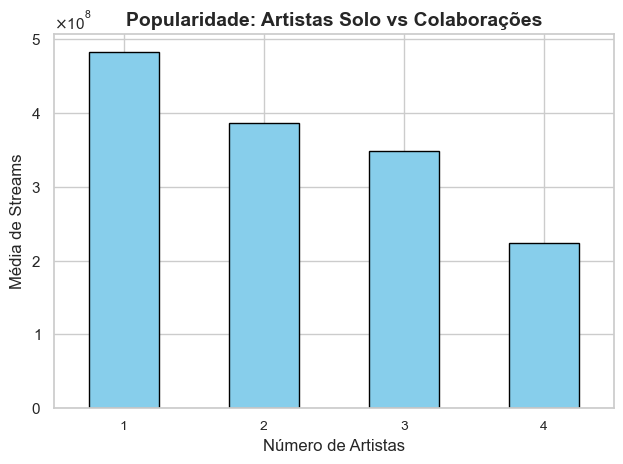

In [63]:
from matplotlib.ticker import ScalarFormatter

# Contar a frequência de músicas com 1, 2, 3 e 4 artistas
frequencia_artistas = df_novo['artist_count'].value_counts()

# Exibir os resultados
print(frequencia_artistas)

df_novo.groupby('artist_count')['streams'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
sns.set(style="whitegrid")
plt.title('Popularidade: Artistas Solo vs Colaborações', fontsize=14, weight='bold')
plt.ylabel('Média de Streams', fontsize=12)
plt.xlabel('Número de Artistas', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# Ajustar os números do eixo y para um formato mais legível (sem notação científica)
plt.ticklabel_format(style='plain', axis='y')
# Configurar o eixo y para exibir notação científica (1*10^8)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8))

# Adicionar espaçamento para evitar que os rótulos fiquem cortados
plt.tight_layout()

# Exibir o gráfico
plt.show()
# Mostrar o gráfico

plt.show()

In [ ]:
#As músicas com um único artista possuem a maior média de streams, em torno de 500 milhões.
#Logo, músicas de artistas solo tendem a ter mais popularidade (ou mais streams) em comparação com colaborações.

#O número muito menor de músicas com 4 artistas sugere que essas colaborações são raras, o que pode afetar a média de streams. Porém, quando essas colaborações ocorrem, 
# elas ainda podem ser bastante populares em termos absolutos, considerando que são poucas e tendem a atrair atenção por reunir vários artistas importantes.

# Portanto, embora músicas solo tenham uma grande vantagem em termos de quantidade e streams médios, colaborações maiores não devem ser descartadas, 
# pois têm o potencial de serem populares em casos específicos, mesmo que sua média seja influenciada pela baixa representatividade na amostra.

# Músicas presentes em várias plataformas (Spotify, Apple Music, Deezer) têm melhor desempenho em termos de streams?


in_multiple_platforms
True     706
False     73
Name: count, dtype: int64


C:\Users\victo\AppData\Local\Temp\ipykernel_26064\2766566257.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



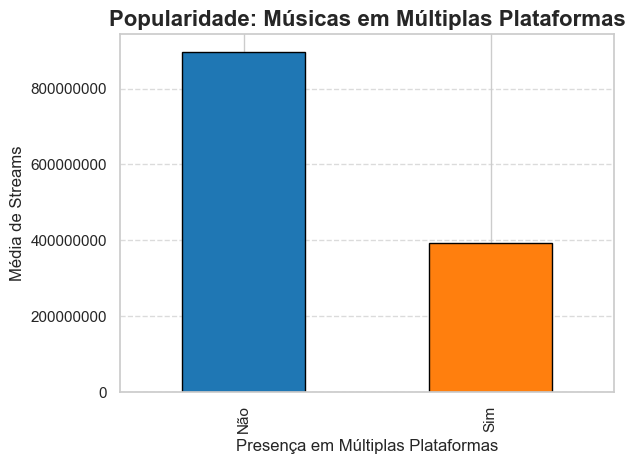

In [70]:
freqquencia_mult = df_novo['in_multiple_platforms'].value_counts()
print(freqquencia_mult)

sns.set(style="whitegrid")
df_novo['in_multiple_platforms'] = (df_novo['in_spotify_playlists'] > 0) & (df_novo['in_apple_playlists'] > 0) & (df_novo['in_deezer_playlists'] > 0)
df_novo.groupby('in_multiple_platforms')['streams'].mean().plot(kind='bar', title='Popularidade: Músicas em Múltiplas Plataformas')
# Fazendo o gráfico de barras com cores mais vivas e borda nas barras
df_novo.groupby('in_multiple_platforms')['streams'].mean().plot(
    kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Popularidade: Músicas em Múltiplas Plataformas', fontsize=16, weight='bold')
plt.ylabel('Média de Streams', fontsize=12)
plt.xlabel('Presença em Múltiplas Plataformas', fontsize=12)

# Adicionando rótulos mais informativos ao eixo x
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], fontsize=11)

# Formatando os números no eixo y para notação científica (sem notação científica exagerada)
plt.ticklabel_format(style='plain', axis='y')

# Adicionando grade para facilitar a visualização dos dados
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Temos que
# 73 músicas estão presentes em menos de três plataformas (ou seja, em apenas uma ou duas plataformas).

# Isso indica que a maioria das músicas da amostra está disponível em mais de uma plataforma, 
# sugerindo que a distribuição por múltiplas plataformas é uma estratégia comum para os artistas ou gravadoras.

# A interpretação inicial da análise pode parecer contra-intuitiva, mas 
# as músicas presentes em menos plataformas (False) têm uma média de streams significativamente maior do que aquelas distribuídas em múltiplas plataformas

# Músicas presentes em menos plataformas podem, em média, gerar mais streams, o que pode estar relacionado a estratégias de exclusividade ou foco em uma única plataforma.
# Músicas distribuídas em múltiplas plataformas, embora mais comuns (706 contra 73), têm uma média menor de streams, o que pode indicar que a distribuição ampla dilui a concentração de streams